**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

In [323]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [324]:
os.environ['OMP_NUM_THREADS'] = '1'

In [325]:
# Carregando os dados 
df = pd.read_csv('Mall_Customers.csv', encoding='utf-8')

In [326]:
# Visualizar as primeiras linhas do DataFrame 
print('Primeiras linhas dos Dados:\n')
df.head()

Primeiras linhas dos Dados:



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [327]:
# Substituindo os nomes das variaveis para facilidar a codificação 
df.columns = ['id_cliente', 'genero', 'idade', 'renda_anual_k', 'pontuacao_gastos']

# Conferindo os nomes das colunas 
df.columns

Index(['id_cliente', 'genero', 'idade', 'renda_anual_k', 'pontuacao_gastos'], dtype='object')

In [328]:
# Visualizar o tamanho do DataFrame
print(f'O dataset contem: {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataset contem: 200 linhas e 5 colunas


### Dimensão do Conjunto de Dados

O conjunto de dados é relativamente pequeno, com apenas 200 linhas e 5 colunas.
No entando, ele é suficiente para aplicar o algoritimo de agrupamento k-Means e seguimentarmos os clientes em grupos com caracteristicas semelhantes

In [330]:
# Verificar os dados duplicados
print(f'Número de linhas duplicadas: {df.duplicated().sum()}')

Número de linhas duplicadas: 0


### Verificação de Dados Duplicados 

Foi realizada a verificação de regsitros duplicados no conjunto de dados. Essa etapa é essencial para garantir que cada linha represente um indivíduo único. 

In [332]:
# Verificar as informações dos dados
print('Informações dos Dados\n')
df.info()

Informações dos Dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_cliente        200 non-null    int64 
 1   genero            200 non-null    object
 2   idade             200 non-null    int64 
 3   renda_anual_k     200 non-null    int64 
 4   pontuacao_gastos  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Verificação dos Tipos de Dados

Analisando as informações acima, podemos ver que os tipos das colunas estão corretos. Porém, é importante observar que a variável _'Gender'_ esta como _object_, ou seja, categórica. Caso decidamos utilizá-la no modelo, será necessário transformá-la em variável numérica, pois o algoritmo K-Means não aceita dados categóricos.

In [334]:
# Visualizar as descrição estatísticas das colunas numéricas 
print('Estatísticas descritivas\n')
df.describe()

Estatísticas descritivas



,id_cliente,idade,renda_anual_k,pontuacao_gastos
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Análise da Descrição dos Dados 

Podemos observar que, á primeira vista, todos os dadoos parecemm legítimos. A idade dos clientes varia de 18 a 70 anos, uma faixa razóavel e esperada. A renda anual é bem diversificada, variando de 15 mil a 137 mil dólares, o que é exelente para formar grupos com diferentes perfis econômicos. Essa diversidade também se reflete na pontuação de gasto, que vai de 1 a 99, indicando clientes com comportamentos de consumo bastante distintos.

In [336]:
# Visualizar os valores unicos da coluna 'Gender'
print(f'Valores da coluna Gender: {df['genero'].unique()}')

Valores da coluna Gender: ['Male' 'Female']


### Verificar os Valores Únicos na Coluna Categórica

Os valores da coluna _'Gender'_ estão corretos e dentro do esperado: _'Male'_ e _'Female'_. Isso indica que não há erros de digitação ou categórias inconsistente. Verificar os valores únicos é uma etapa essencial para garantir a integridade dos dados antes de aplicar técnicas de codificação e construir um modelo de machile learning.

In [338]:
# Verificação de outliers nas colunas numéricas usando IQR
def detectar_outlers_IQR(cvoluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    print(f'{coluna}: {len(outliers)} outliers encontrados')

# Aplicando nas colunas numéricas relevantes
colunas_numericas = ['idade', 'renda_anual_k', 'pontuacao_gastos']
for coluna in colunas_numericas:
    detectar_outlers_IQR(coluna)


idade: 0 outliers encontrados
renda_anual_k: 2 outliers encontrados
pontuacao_gastos: 0 outliers encontrados


### Verificação de Outliers nas Colunas Numéricas

Utilizando o método IQR para detecatr outliers, foi identificado que apenas a coluna _'Annul Income (k$)'_ possui 2 valores considerados extremos. No entanto, esse dados podem representra clientes com sálarios mais elevados e, portanto, são **valores legítimos**.Por esse motivo, decidi **manter esses registro** no conjunto de dados.

In [340]:
# Verificalçao dos valores nulos nos dados
print('Quantidade de valores nulos nos dados:\n')
df.isnull().sum()

Quantidade de valores nulos nos dados:



id_cliente          0
genero              0
idade               0
renda_anual_k       0
pontuacao_gastos    0
dtype: int64

### Verificação de Valores Nulos nos Dados

Analisando o código, percebemos que **não há valores nulos** no DataFrame. Isso **simplifica nossa análise**, pois não será necessário realizar tratamento como preenchimento com média, mediana, moda ou exclusão de linhas.

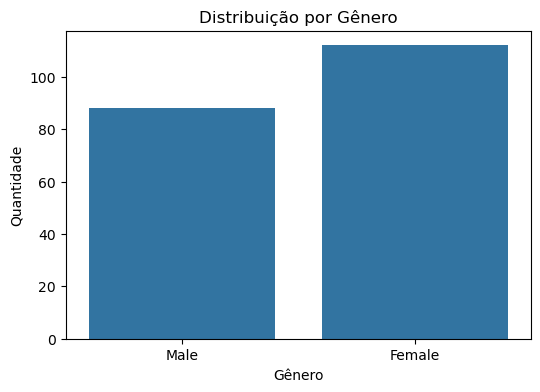

In [342]:
# Distribuição de Gênero
plt.figure(figsize=(6,4))
sns.countplot(x='genero', data=df,)
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

### Analise da Quantidade de Gênero

Podemos observar a distribuição da quantidade de homens e mulheres em nosso dados: aproximadamente 85 homens e 115 mulheres. Os dados **não estão muito desequilibrado** em relação ao gênero, o que é positivo para uma análise mais justa e representativa.

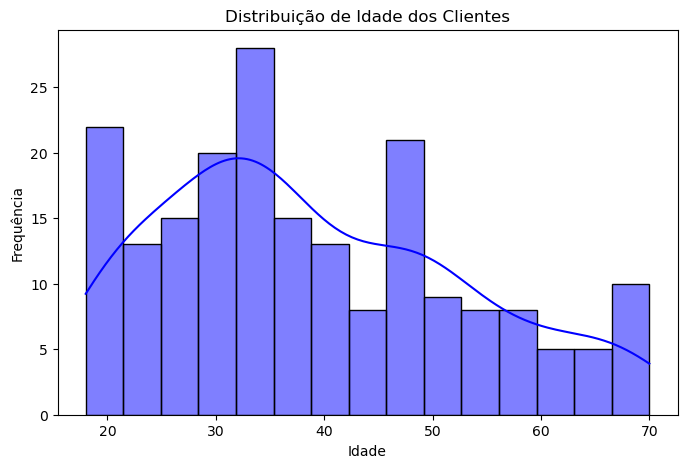

In [344]:
# Distribuição de Idade
plt.figure(figsize=(8,5))
sns.histplot(df['idade'], bins=15, kde=True, color='blue')
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

### Análise da Distribuição de Idade

A distribuição de idade dos clientes **não é uniforme**. Observamos picos de frequência entre 20-25 anos, e 30-35 anos, enquanto a faixa como 55-65 têm menor presença.
Essa concentração pode refletir o perfil típico de frequentadores do shopping, possivelmente atraídos por lojas de moda, tecnologia ou alimentação, que geralmente despertam mais enterrese em públicos mais jovens e adultos em ínicio de carreira. Esse padrão pode indicar preferências específicas de consumo por faixa etária, o que será útil na criação de segmentos com o K-Means

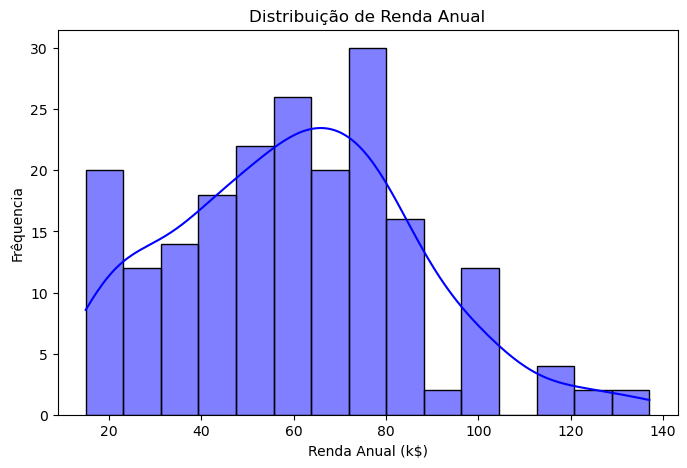

In [346]:
# Distribuição de Renda Anual
plt.figure(figsize=(8,5))
sns.histplot(df['renda_anual_k'], bins=15, kde=True, color='blue')
plt.title('Distribuição de Renda Anual')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Frêquencia')
plt.show()

### Análise Distribuição de Renda Anual

A distribuição de renda anual apresenta uma certa dispersão. Há um grupo de cleintes com rendas entre 15 mil dólares, indicando um público com menor poder aquisitivo, que estar mais interessado em promoções ou lojas de valor acessível. Em contrapartida, há clientes com rendas superiores a 100 mil dólares, embora em menor número, que podem se interresar por lojas premium ou serviço personalizados. Essa diversidade indica a necessidade de estratégias diferentes para atender a perfis com capacidades de gasto distintas dentro do shopping. 

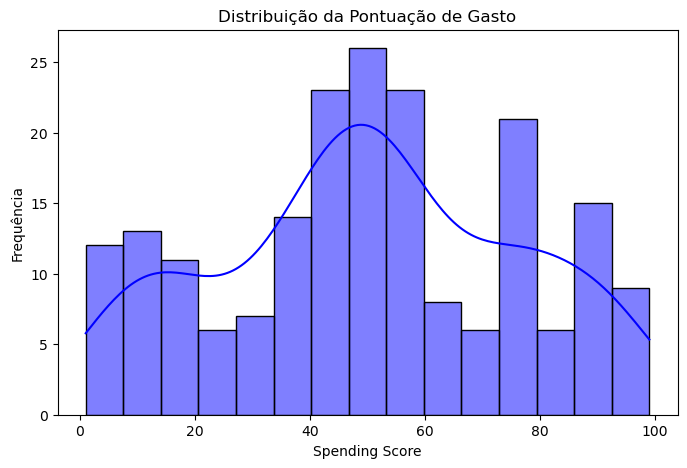

In [348]:
# Distribuição de Pontuação de Gasto
plt.figure(figsize=(8,5))
sns.histplot(df['pontuacao_gastos'], bins=15, kde=True, color='blue')
plt.title('Distribuição da Pontuação de Gasto')
plt.xlabel('Spending Score')
plt.ylabel('Frequência')
plt.show()

### Análise da Distribuição da Pontuação de Gasto

A distribuição da **Speding Score** revela diferentes padrões de comportamento de compras entre os clientes. Há uma concentraçãosignificativa de pontuação entre 40 e 60, indicando um grupo com nível de gasto moderado. Também é notável a presença de clientes com pontuaç~~oes acima de 80, surgerindo um segmento mais engajado, com hábitos de consumo mais intensos ou compras de maior valor.
Em contrapartida, clientes com pontuação abaixo de 20 aparecem em menor número, mas ainda representam uma parcela importante - possivelmente mais cautelosos ou menos frequêntes no shopping. Esses diferentes níveis de gasto reforçam a diversidade de perfis de consumidores e indicam oportunidade para estratégias segmentadas de markting e oferta.

## Análise Bivariada

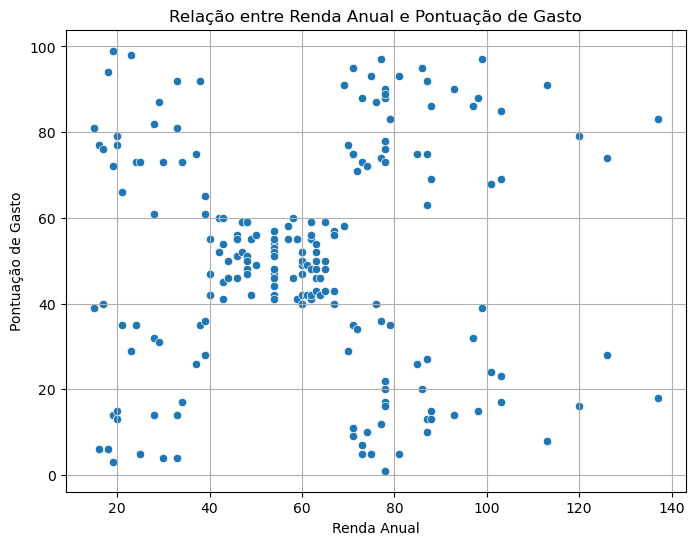

In [351]:
# Renda vs pontuação de Gastos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='renda_anual_k', y='pontuacao_gastos', data=df)
plt.title('Relação entre Renda Anual e Pontuação de Gasto')
plt.xlabel('Renda Anual')
plt.ylabel('Pontuação de Gasto')
plt.grid(True)
plt.show()

### Análise da Relação entre Renda Anual e Pontuação de Gasto

A análise conjunta entre a renda e a pontuação de gasto evidencia a formação de agrupamentos distintos, surgerindo diferentes perfis de comsumidores com base nessas variáveis. É possível identificar, visualmente, pelo mesnos cinco grupos relevantes: clientes com baixa renda e baixo gasto; clientes com baixa renda e alto gasto; clientes com renda e gasto médios; clientes com alta renda, mas gasto reduzidos; e, por fim, clientes com alta renda e alto gasto. essa diversidade de padrões aponta para comportamento de consumo variados dentro de cada faixa de renda, surgerindo que a relação entre as variáveis não é linear. Esses agrupamentos reforçam a necessidade de estratégias segmentadas de markting e indicam que método como o K-Means podem ser eficazes para classificar os diferentes perfis de clientes com maior precisão.

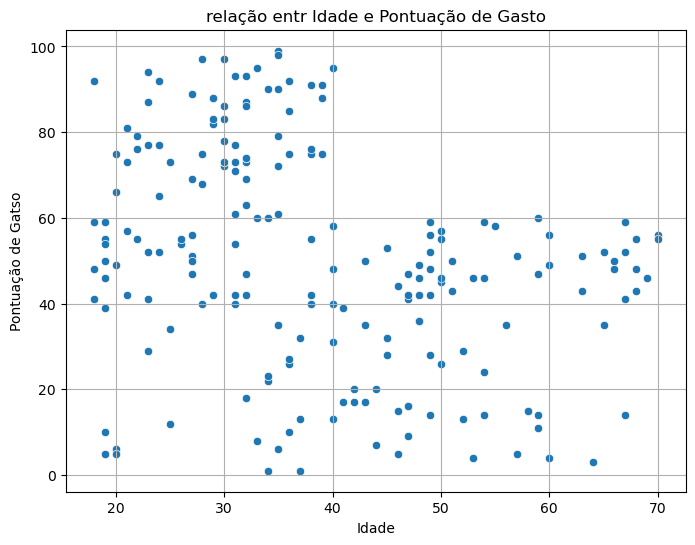

In [353]:
# Analíse de Idade vs Pontuação de Gasto
plt.figure(figsize=(8, 6))
sns.scatterplot(x='idade', y='pontuacao_gastos', data=df)
plt.title('relação entr Idade e Pontuação de Gasto')
plt.xlabel('Idade')
plt.ylabel('Pontuação de Gatso')
plt.grid(True)
plt.show()


### Análise de Relação entre Idade e Pontuação de Gasto

A dispersão entre idade e pontuação e gasto não revela uma relação clara, indecando que clientes de diferentes faixas etárias apresentam comportamento de consumo variados. A ausência de agrupamentos definidos surgere que a idade, isoladamente, não é um forte indicativo do nível de gasto, reforçando a iportância de considerar outras varíaveis na segmentação de clientes.

In [355]:
# Crando uma instância do LabelEncoder
le = LabelEncoder()

#Aplicando o LabelEncoder na coluna 'genero'
df['genero_encoded'] = le.fit_transform(df['genero'])

# Visualizar as primeiras linhas com a nova coluna
df.head()

,id_cliente,genero,idade,renda_anual_k,pontuacao_gastos,genero_encoded
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [356]:
# Selecionando as colunas relevantes para a modelagem
df_model = df[['idade', 'renda_anual_k', 'pontuacao_gastos', 'genero_encoded']].copy()

# Visualizando as primeriras linhas do novo DataFrame 
print('Primeiras linhas do DataFrame para a modelagem:\n')
df_model.head()

Primeiras linhas do DataFrame para a modelagem:



,idade,renda_anual_k,pontuacao_gastos,genero_encoded
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [357]:
# Criando uma instância do StandarScaler
scaler = StandardScaler()

# Selecionando as conulas númericas para escalonar
numerical_cols = ['idade', 'renda_anual_k', 'pontuacao_gastos']

# Aplicando o sacler aos dados numéricos
df_model[numerical_cols] = scaler.fit_transform(df_model[numerical_cols])

# Visualizando as primeiras linhas do DataFrame com as colunas escalonadas
print('Primeiras linhas do DataFrame com as colunas numéricas escalonadas:\n')
df_model.head()

Primeiras linhas do DataFrame com as colunas numéricas escalonadas:



,idade,renda_anual_k,pontuacao_gastos,genero_encoded
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


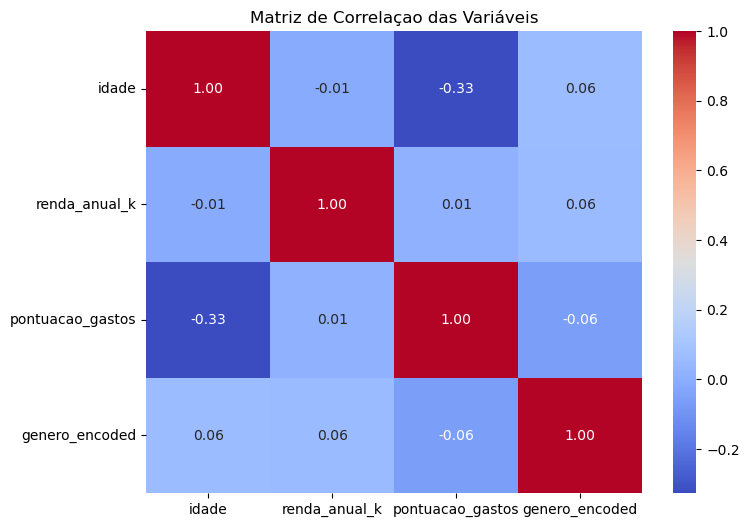

In [358]:
# Calculando a matriz de correlação
correlation_matrix = df_model.corr()

# Criando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlaçao das Variáveis')
plt.show()

### Analise da Matrix de Correlação

A matriz de correlação revela que as variáveis analisadas possuem baixa correlação linear entre si, indicando contribuição relativamente independestes na fomação dos grupos. A ausência de fortes relações lineares, especialmente entre renda anual e pontuação de gasto, reforça a utilidade do do K-Means, que pode idetificar padrões de agrupamento mesmo em contexto de baixa correlação.

C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

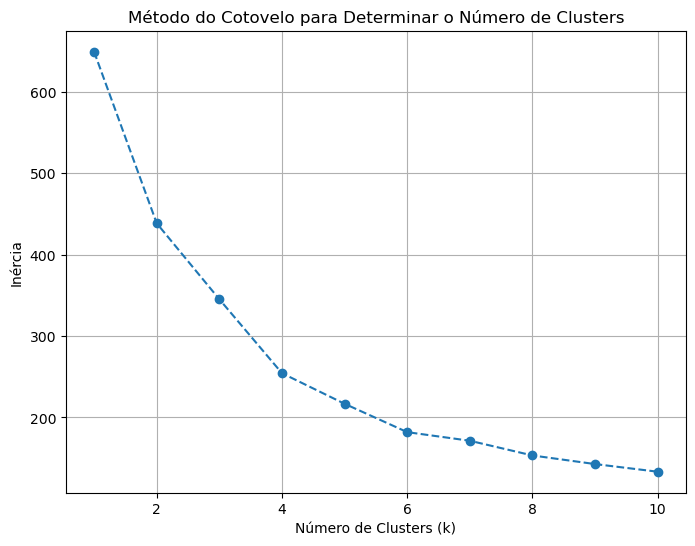

In [360]:
# Lista para armazenar a inércia para diferentes números de clusters
inertia = []

# Testando diferentes números de clusters (de 1 a 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto') # n_init para evitar aviso
    kmeans.fit(df_model)
    inertia.append(kmeans.inertia_)

# Plotando o Método do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

In [361]:
# Definindo o número de clusters
n_clusters = 6

# Aplicando o algoritmo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(df_model)

# Visualizando as primeiras linhas do DataFrame com a atribuição dos cluster
print('Primeiras linhas do DataFrame com a atribuição de cluster:\n')
df.head()

Primeiras linhas do DataFrame com a atribuição de cluster:



C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,id_cliente,genero,idade,renda_anual_k,pontuacao_gastos,genero_encoded,Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,2


In [362]:
# Contando o número de clientes em cada cluster
print('Número de clientes por cluster:\n')
df['Cluster'].value_counts().sort_index()

Número de clientes por cluster:



Cluster
0    45
1    39
2    21
3    34
4    23
5    38
Name: count, dtype: int64

### Criação e Aplicação do Modelo K-Means

O modelo K-Means foi configurado com 6 cluster e aplicado aos dados escalonados para identificar grupos de cleintes com perfis semelhantes. A função _fit_predict()_ realizou o agrupamento e atribuiu um rótulo de cluster a cada cliente, que foi armazenado em uma nova coluna chamada 'Cluster' no DataFrame original. A contagem de cleintes por grupo permite observar a distribuição dos dados entre os cluster formados, oferecendo uma base sólida para análise segmentada e estratégias de markieting direcionadas

In [364]:
# Agrupando por cluster e calculando a média das variáveis
cluster_means = df.groupby('Cluster') [['idade', 'renda_anual_k', 'pontuacao_gastos']].mean()
print('Média das variáveis por cluster')
print(cluster_means)

# Analisando a distribuição de gêmero por cluster
gender_distribution = df.groupby('Cluster')['genero'].value_counts(normalize=True).unstack(fill_value=0)
print('Distribuição de gênero por cluster:\n')
print(gender_distribution)

Média das variáveis por cluster
             idade  renda_anual_k  pontuacao_gastos
Cluster                                            
0        56.333333      54.266667         49.066667
1        32.692308      86.538462         82.128205
2        45.523810      26.285714         19.380952
3        41.264706      88.500000         16.764706
4        25.000000      25.260870         77.608696
5        27.000000      56.657895         49.131579
Distribuição de gênero por cluster:

genero     Female      Male
Cluster                    
0        0.577778  0.422222
1        0.538462  0.461538
2        0.619048  0.380952
3        0.411765  0.588235
4        0.565217  0.434783
5        0.657895  0.342105


### Insights dos Cluster Identificados pelo K-Means

- Cluster 0 - Clientes mais velhos com perfil equilibrado
Idade média: 56 anos | Renda: Moderada (54k) | Gasto: Médio (49)
Público mais maduro e estável, potencial para fidelização com conforto e qualidade.

- Cluster1 - Jovens com alta renda e alto gasto
Idade média: 33 anos | Renda: Alta (84k) | Gasto: Alto (82)
Segmento premium: ideal para campanhas exclusivas, experiências e tendências

- Cluster 2 - Meia-idade com baixa renda e baixo gasto
Idade média: 46 anos | Renda: Baixa (26k) | Gasto: Baixo (19)
Público mais econômico; foco em promoções, cupons e fidelidade de longo prazo.

- Cluster 3 - Meia-idade com alta renda e gasto baixo
Idade média: 41 anos | Renda: Alta (84k) | Gasto: Baixo(17)
Público seleto, mais cauteloso; estartégias personalizadas e focadas em serviços.

- Cluster 4 - Jovens com baixa renda e alto gasto
Idade média: 25 anos | Renda: Baixa (25k) | Gasto: Alto (78)
Jovens consumidores impulsivos; foco em descontos, entreterimento e mídia social.

- Cluster 5 - Jovens com renda e gasto médio
Idade média: 27 anos | Renda: Moderada (57k) | Gasto: (49)
Público versátil; campanhas equilibradas entre qualidade e preço justo


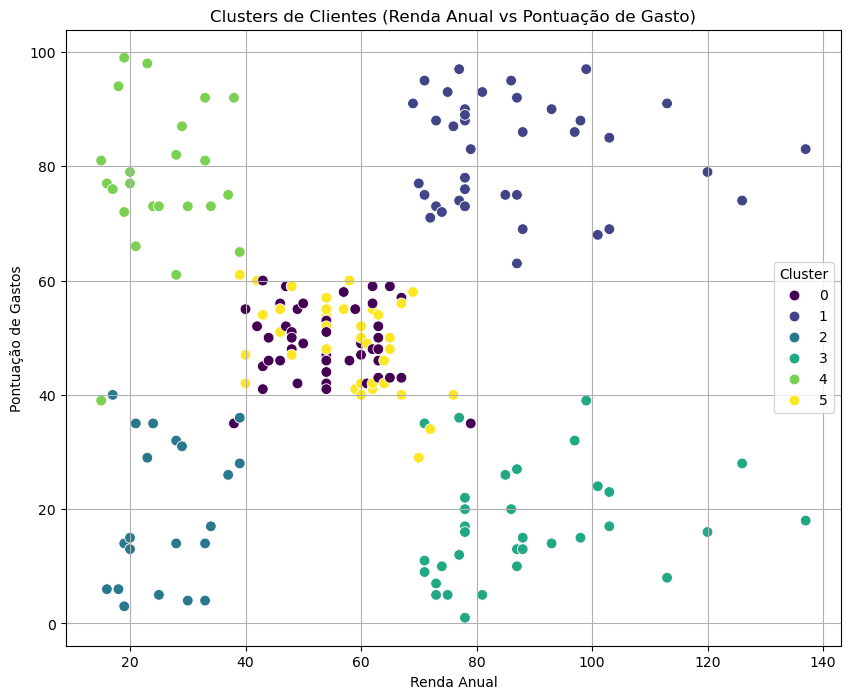

In [366]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='renda_anual_k', y='pontuacao_gastos', hue='Cluster', data=df, palette='viridis', s=60)
plt.title('Clusters de Clientes (Renda Anual vs Pontuação de Gasto)')
plt.xlabel('Renda Anual')
plt.ylabel('Pontuação de Gastos')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Sugestão de Aplicação Práticas para os Cluster Identificados

- Cluster 1 (Jovens com Alta Renda e Alto Gasto):
Estratégias de Marketing: Campanhas focadas em novidades, tendências da moda, eletrônicos e experiências premium. Utilizar plataformas de mídia social e influenciadores digitais.
Personalização de Ofertas: Programas de fidelidade com recompensas por gastos, eventos exclusivos, acesso antecipado a lançamentos e ofertas personalizadas com base em compras anteriores de itens de luxo ou de tendência.

- Cluster 4 (Jovens com Baixa Renda e Alto Gasto):
Estratégias de Marketing: Promoções, descontos para estudantes, ofertas de "compre um, leve outro", foco em itens de bom custo-benefício e entretenimento. Marketing em plataformas populares entre jovens, como TikTok e Instagram.
Personalização de Ofertas: Descontos em horários específicos, programas de indicação, ofertas em itens de moda acessível e entretenimento.

- Cluster 3 (Meia-Idade com Alta Renda e Baixo Gasto):
Estratégias de Marketing: Abordagens mais informativas, destacando serviços (bancos, casa, etc.) e produtos de maior durabilidade. Marketing via e-mail e canais que ofereçam mais detalhes sobre os produtos/serviços.
Personalização de Ofertas: Benefícios exclusivos em serviços, convites para eventos seletos relacionados a seus interesses (a serem melhor compreendidos com dados adicionais), ofertas em produtos de maior valor agregado.

- Cluster 2 (Meia-Idade com Baixa Renda e Baixo Gasto):
Estratégias de Marketing: Mensagens que ressaltem o valor e a economia. Promoções sazonais e ofertas em itens essenciais. Utilização de cupons de desconto e programas de fidelidade com recompensas de longo prazo.
Personalização de Ofertas: Descontos em dias específicos, ofertas em produtos básicos e de necessidade diária.

- Cluster 0 (Mais Velhos com Renda Moderada e Gasto Médio):
Estratégias de Marketing: Abordagens mais tradicionais, destacando conforto, qualidade e confiabilidade. Considerar mídias offline (jornais, revistas locais) e online (e-mail marketing com linguagem clara e acessível).
Personalização de Ofertas: Descontos para idosos, promoções em dias da semana, ofertas em produtos que atendam às suas necessidades (saúde, bem-estar, casa).

- Cluster 5 (Jovens com Renda Moderada e Gasto Médio):
Estratégias de Marketing: Marketing digital, influenciadores de nicho, promoções em itens de moda, tecnologia e experiências.
Personalização de Ofertas: Programas de fidelidade com recompensas em itens de interesse (moda, eletrônicos), ofertas de pacotes e descontos em marcas específicas.
